In [26]:
import numpy as np
import tensorflow as tf

In [27]:
data_dir = '../'

with np.load(data_dir+'\\T0l.npz') as eletr_score:
    for item in eletr_score.files:
        T0l = eletr_score[item]
with np.load(data_dir+'\\T1l.npz') as data_xS:
    for item in data_xS.files:
        T1l = data_xS[item]
with np.load(data_dir+'\\T2l.npz') as data_xS:
    for item in data_xS.files:
        T2l = data_xS[item]

print('Dataset .npz encontrado!')

Dataset .npz encontrado!


In [28]:
tam_data = 721

x1 = [T1l[:,i:i+tam_data] for i in range(0,len(T1l[0]),tam_data) if i+tam_data < len(T1l[0])]
x2 = [T2l[:,i:i+tam_data] for i in range(0,len(T2l[0]),tam_data) if i+tam_data < len(T2l[0])]
x1 = np.array(x1); x2 = np.array(x2)
print(x1.shape, x2.shape)

(326, 16, 721) (321, 16, 721)


In [29]:
x = np.concatenate((x1,x2),axis=0)
y = [0 for i in x1] + [1 for i in x2]
y = np.array(y)

print(f'{len(x1)} + {len(x2)} = {len(x1)+len(x2)}')
print(f'Tamanho de x: {x.shape}')

326 + 321 = 647
Tamanho de x: (647, 16, 721)


In [30]:
from sklearn.utils import shuffle
x, y = shuffle(x,y,random_state=0)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [32]:
import keras
from keras_tuner import HyperModel
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

Esse aqui fui eu que testei

In [33]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=(3,), activation='relu'))
model.add(Conv1D(filters=20, kernel_size=(6,), activation='relu'))
model.add(MaxPooling1D(pool_size=(2,)))
model.add(Flatten())
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5209 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6950
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5177 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6958
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6958
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4875 - loss: 0.6936 - val_accuracy: 0.4000 - val_loss: 0.6964
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5620 - loss: 0.6912 - val_accuracy: 0.4000 - val_loss: 0.6962
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5089 - loss: 0.6930 - val_accuracy: 0.4000 - val_loss: 0.6954
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5298 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6953
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4963 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss

Esse aqui Fernando pediu pra eu testar

Nota: eu mudei de (721,16) para (16,721) para ficar no formato usado aqui. Caso queira testar com outro shape, só dar x_train.transpose((0,2,1)) e o mesmo pra x_test.

In [40]:
model = Sequential([
        Conv1D(20, kernel_size=6, activation='relu', input_shape=(16,721)),
        Conv1D(20, kernel_size=6, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(60, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

model.compile(optimizer=Adam(learning_rate=0.0003),
                loss='binary_crossentropy',
                metrics=['accuracy'])

C:\Users\Enenon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
hist = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4570 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6937
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4743 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6940
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5305 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6943
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4919 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6943
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4770 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6946
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4697 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.6955
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4940 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


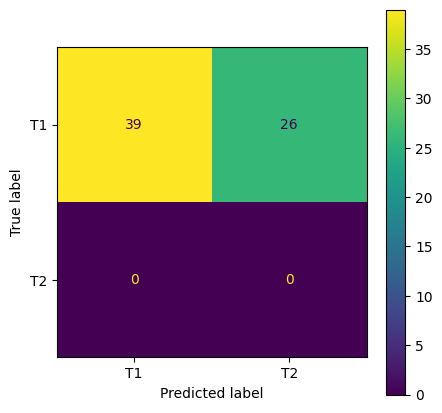

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

#Make predictions
y_probs = model.predict(x_test)
#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
#Confusion matrix
cm=confusion_matrix(y_preds,y_test)
#
label_names = ["T1","T2"]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [37]:

METRICS = [
        keras.metrics.TruePositives(name='tp'),
        keras.metrics.FalsePositives(name='fp'),
        keras.metrics.TrueNegatives(name='tn'),
        keras.metrics.FalseNegatives(name='fn'),
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc'),
    ]
class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        
        model.add(
            Conv1D(
                filters=hp.Int('filters', min_value=20, max_value=60, step=10, default=40),
                kernel_size=hp.Int('kernel_size', min_value=2, max_value=10, step=2, default=4),  
                activation='relu',
                input_shape=self.input_shape
            )
        )
        
        model.add(
            Conv1D(
                filters=hp.Int('filters', min_value=20, max_value=60, step=10, default=40),
                kernel_size=hp.Int('kernel_size', min_value=2, max_value=10, step=2, default=4),  
                activation='relu'
            )
        )
        
        model.add(
            MaxPooling1D(
                pool_size=hp.Int('pool_size', min_value=2, max_value=5, step=1, default=3),  
                strides=hp.Int('strides', min_value=2, max_value=5, step=1, default=3),  
                padding='same'
            )
        )
        
        model.add(Flatten())
        
        model.add(
            Dense(
                units=hp.Int('units_dense', min_value=40, max_value=120, step=20, default=80),
                activation='relu'
            )
        )
        
        # Saída binária com sigmoid
        model.add(Dense(2, activation='softmax'))

        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
            ),
            loss='categorical_crossentropy',
            metrics=METRICS
        )
        
        return model


In [38]:
model = CNNHyperModel(721,2)
model.fit(x_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

Nota: não faz sentido usar SVM para arrays muito grandes, como os dados brutos.

## Testando SVM simples

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.sparse.linalg

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train.reshape(x_train.shape[0],-1), y_train)

ValueError: Found array with dim 3. SVC expected <= 2.

In [ ]:
x_train.reshape(x_train.shape[0],-1).shape

(688, 11536)

In [ ]:
y_train.shape

(688,)

In [ ]:
# fazer previsões no conjunto de teste
y_pred = svm_model.predict(x_test)

# avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Found array with dim 3. SVC expected <= 2.